In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
y = np.array(df['label'])

In [4]:
df.pop('label')

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [5]:
X = df

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## PCA

In [8]:
from sklearn.decomposition import PCA

In [46]:
pca =PCA(n_components=50, svd_solver='randomized',
          whiten=True)

In [47]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [48]:
X_pca = pca.transform(X_train)

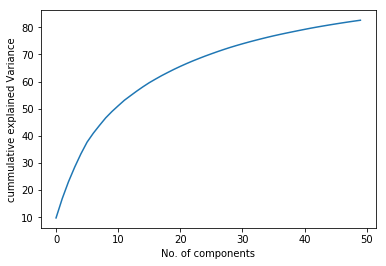

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [50]:
X_pca.shape

(33600, 50)

In [51]:
X_test_pca = pca.transform(X_test)

In [52]:
X_test_pca.shape

(8400, 50)

## Using SVM

In [53]:
from sklearn.svm import SVC

In [54]:
clf = SVC()

In [55]:
clf.fit(X_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))


In [58]:
print_score(clf, X_pca, X_test_pca, y_train, y_test, train = True)
print_score(clf, X_pca, X_test_pca, y_train, y_test, train = False)

Train Result : 

Accuracy Score 0.9929

Classification Report : 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3316
          1       0.99      1.00      0.99      3775
          2       0.99      0.99      0.99      3331
          3       1.00      0.99      0.99      3414
          4       0.99      0.99      0.99      3233
          5       0.99      0.99      0.99      3093
          6       1.00      1.00      1.00      3352
          7       0.99      0.99      0.99      3508
          8       1.00      0.99      0.99      3228
          9       0.99      0.99      0.99      3350

avg / total       0.99      0.99      0.99     33600
 

Confusion Metrics : 
 [[3307    0    0    0    2    2    3    0    1    1]
 [   0 3758    5    0    1    0    1    7    1    2]
 [   0    3 3312    0    4    0    0    9    1    2]
 [   0    0    9 3378    0   12    0    2    9    4]
 [   1    5    1    0 3216    0    1    2    0    7]
 [   5

## Predicting Test Dataset

In [59]:
df = pd.read_csv('test.csv')

In [60]:
X_find = df

In [61]:
X_find_pca = pca.transform(X_find)

In [62]:
y_pred = clf.predict(X_find_pca)

In [63]:
df['label'] = y_pred

In [64]:
df.to_csv('test_1.csv', index=False)